<a href="https://colab.research.google.com/github/Neha13022020/Aadhar_number_masking/blob/main/Aadhar_number_masking_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


## Method 1 : using easyocr

https://github.com/JaidedAI/EasyOCR

In [3]:
pip install easyocr

     |████████████████████████████████| 48.9MB 65kB/s 


In [4]:
import easyocr
import PIL
from PIL import ImageDraw
reader = easyocr.Reader(['en'])

In [49]:
# Draw bounding boxes
def draw_boxes(image, content, color='white', width=5):
    draw = ImageDraw.Draw(image)
    for bound in content:
      for j in bound:
        if type(j) == str and len(j)==14:
            j=j.split(' ')
            if len(j)==3:
              p0, p1, p2, p3 = bound[0]
              l = (p1[0]-p0[0])*9/14
              #print(bound[1])
              draw.rectangle([(p0[0],p0[1]),(p0[0]+l,p3[1])], fill=color, outline =color)
    return image

3429 2099 3643


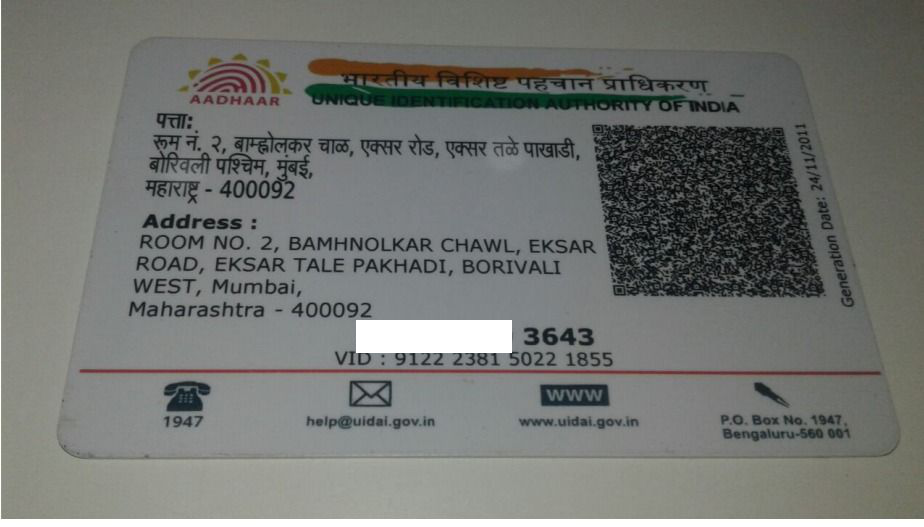

In [46]:

img = PIL.Image.open('/content/gdrive/My Drive/aadhar_image_folder/img1.jpeg')
content = reader.readtext('/content/gdrive/My Drive/aadhar_image_folder/img1.jpeg')
draw_boxes(img, content)

3171 6982 2729


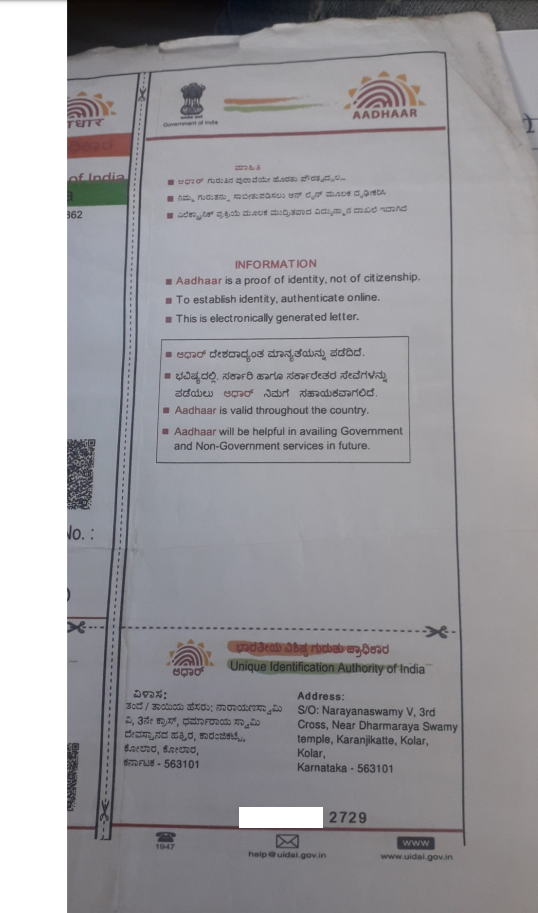

In [47]:
img = PIL.Image.open('/content/gdrive/My Drive/aadhar_image_folder/Capture47.png')
content = reader.readtext('/content/gdrive/My Drive/aadhar_image_folder/Capture47.png')
draw_boxes(img, content)

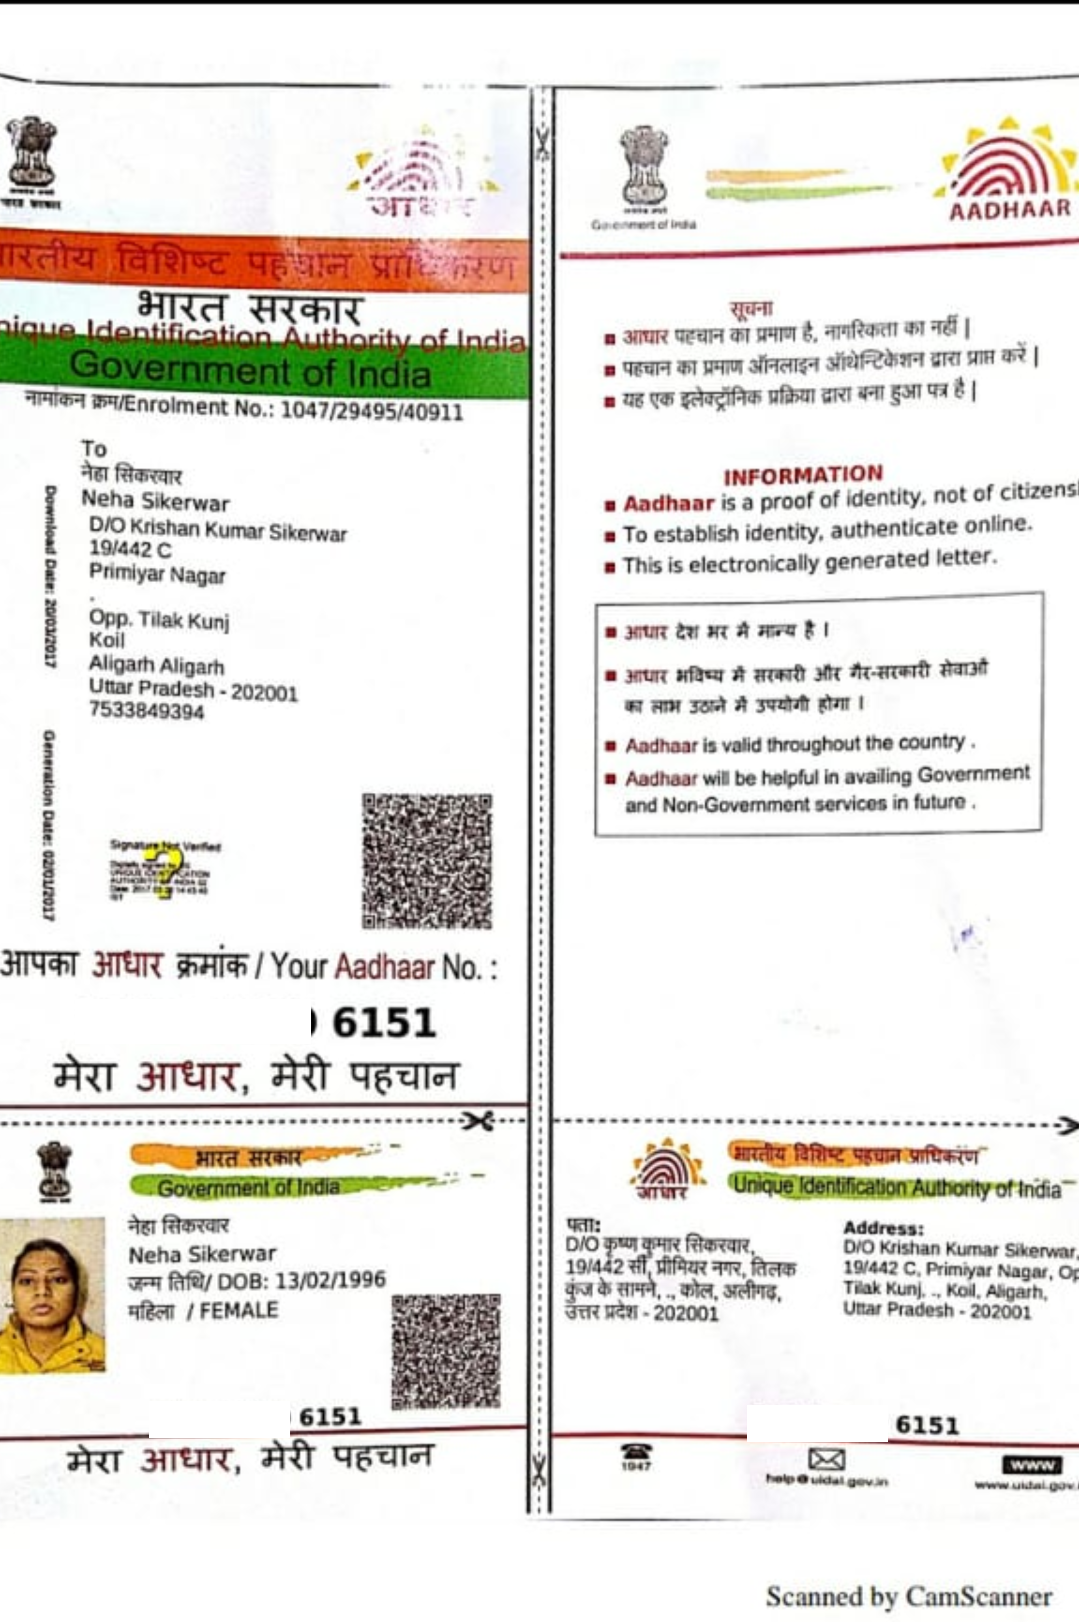

In [50]:
img = PIL.Image.open('/content/gdrive/My Drive/my_aadhar.png')
content = reader.readtext('/content/gdrive/My Drive/my_aadhar.png')
draw_boxes(img, content)

# I have tried with my aadhar card, and in this image at three places we have the number and it's able to mask all three


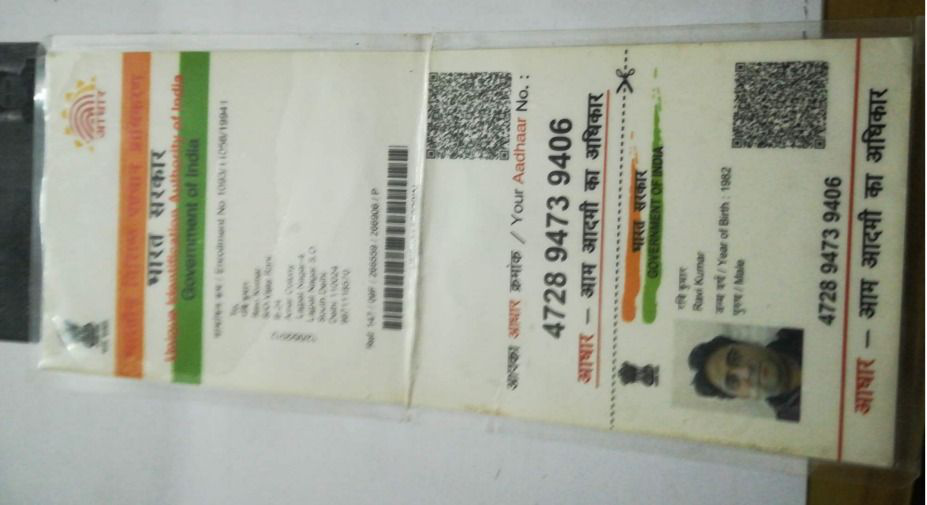

In [51]:
img = PIL.Image.open('/content/gdrive/My Drive/aadhar_image_folder/img2.jpeg')
content = reader.readtext('/content/gdrive/My Drive/aadhar_image_folder/img2.jpeg')
draw_boxes(img, content)

# it is not able to capture the content of this img2.jpeg


## Method 2 : using pytesseract   

https://medium.com/better-programming/highlighting-specific-word-in-an-input-image-1cf3d4f8ae27

### installing and importing libraries

https://stackoverflow.com/questions/50655738/how-do-i-resolve-a-tesseractnotfounderror

In [52]:
pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.6-py2.py3-none-any.whl size=13629 sha256=68e8694adda0327a805bd4e78eeeb80239f4a33e1c46ce992e02d0174eaead1d
  Stored in directory: /root/.cache/pip/wheels/ee/71/72/b98430261d849ae631e283dfc7ccb456a3fb2ed2205714b63f
Successfully built pytesseract


In [53]:
pip install opencv-contrib-python

In [54]:
import pytesseract
from pytesseract import Output
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


In [55]:
!sudo apt update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:7 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [40.1 kB]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:11 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages
Get:12 https://deve

In [56]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 31 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 2s (2,959 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [57]:
!sudo apt install libtesseract-dev


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libleptonica-dev
The following NEW packages will be installed:
  libleptonica-dev libtesseract-dev
0 upgraded, 2 newly installed, 0 to remove and 31 not upgraded.
Need to get 2,755 kB of archives.
After this operation, 13.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libleptonica-dev amd64 1.75.3-3 [1,308 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libtesseract-dev amd64 4.00~git2288-10f4998a-2 [1,447 kB]
Fetched 2,755 kB in 1s (1,858 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 2.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This fr

### masking functions

In [58]:
def img_mask(image_path):
  img = cv2.imread(image_path)
  d = pytesseract.image_to_data(img, output_type=Output.DICT, lang='eng')
  n_boxes = len(d['level'])
  overlay = np.ascontiguousarray(img)
  for i in range(n_boxes):
      c=i+1
      t=i+2
      u=i+3
      v=i-1
      if c<n_boxes and t<n_boxes and u<n_boxes and v>=0:
        if len(d['text'][v])==0 and len(d['text'][i])==4 and len(d['text'][c]) == 4 and len(d['text'][t])==4 and len(d['text'][u])==0:
          print(d['text'][i], d['text'][c], d['text'][t])
          (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
          (x1, y1, w1, h1) = (d['left'][c], d['top'][c], d['width'][c], d['height'][c])
          #(x2, y2, w2, h2) = (d['left'][t], d['top'][t], d['width'][t], d['height'][t])        
          cv2.rectangle(overlay, (x, y), (x + w, y + h), (255, 255, 255), -1)
          cv2.rectangle(overlay, (x1, y1), (x1 + w1, y1 + h1), (255, 255, 255), -1)
  return overlay


#### first image

In [63]:
image_path = '/content/gdrive/My Drive/aadhar_image_folder/img1.jpeg'
overlay = img_mask(image_path)

3429 2099 3643


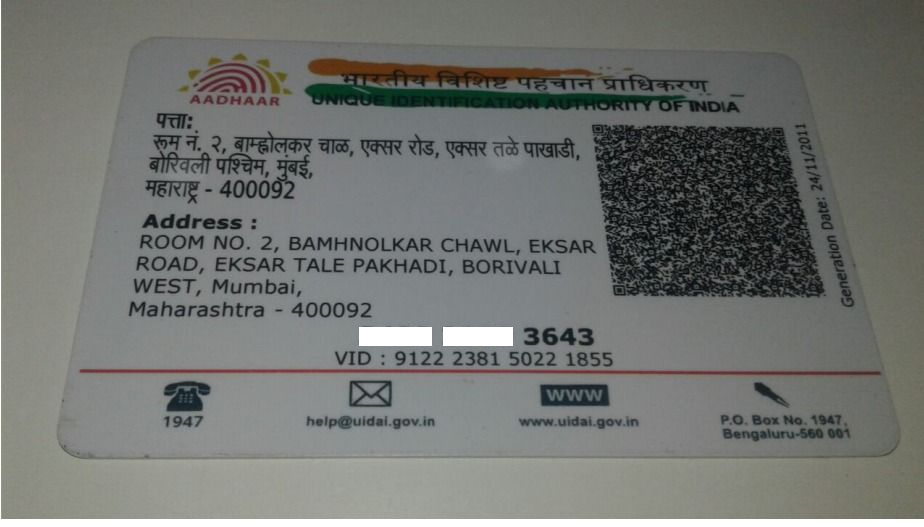

In [64]:
cv2_imshow( overlay)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### second image

In [59]:
# preprocessing functions, as other 2 images are not very clear and methods are failing to read the data from image

def get_grayscale(image):
    img = cv2.imread(image)
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED) 

In [ ]:
# https://nanonets.com/blog/ocr-with-tesseract/
# https://www.pyimagesearch.com/2017/07/10/using-tesseract-ocr-python/

In [65]:
image_path = '/content/gdrive/My Drive/aadhar_image_folder/img2.jpeg'
gray = get_grayscale(image_path)
thresh = thresholding(gray)
#opening = opening(gray)
#canny = canny(gray)

In [69]:
#img = cv2.imread(image_path)
d = pytesseract.image_to_data(thresh, output_type=Output.DICT, lang='eng')
#ocr_result = pytesseract.image_to_data(imgq, lang='eng',  config='--psm 10 --eom 3 -c tessedit_char_whitelist=0123456789')
n_boxes = len(d['level'])
overlay = np.ascontiguousarray(img)
for i in range(n_boxes):
  text = d['text'][i]
  print(text)





 



.
.
a
mm
aah
i
.

TWO
69010
0)
ae

an
oy



aad



Uehlle
be
edie
bie
—
pn



 



  



‘ORUMLmmaReE



MR
Pre



Tithere
.esapeane
SEEDS

?


In [69]:
# not able to read the aadhar number from the image even after preprocessing

#### third image

In [62]:
image_path = '/content/gdrive/My Drive/aadhar_image_folder/Capture47.png'
overlay = img_mask(image_path)

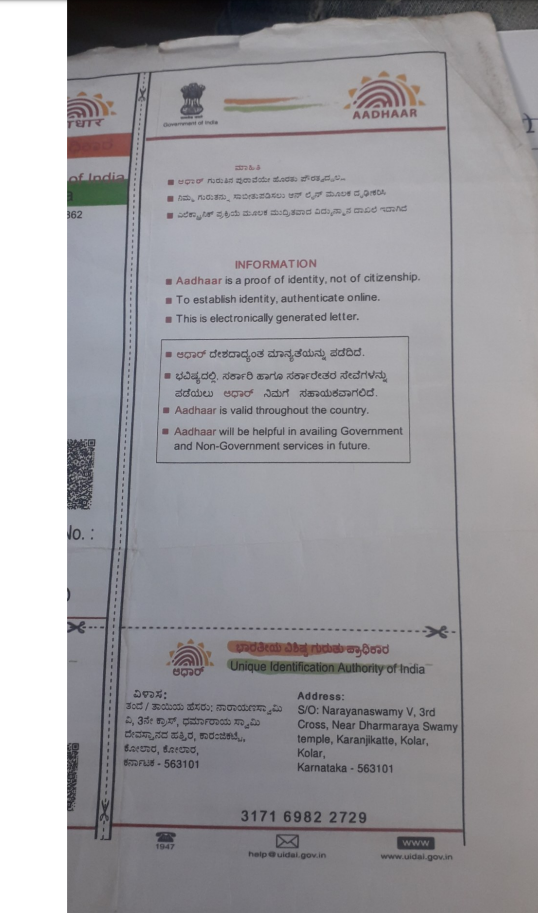

In [64]:
cv2_imshow(overlay)
cv2.waitKey(0)
cv2.destroyAllWindows()

# not able to detect

In [71]:
image_path = '/content/gdrive/My Drive/aadhar_image_folder/Capture47.png'
gray = get_grayscale(image_path)
thresh = thresholding(gray)

In [73]:
#img = cv2.imread(image_path)
d = pytesseract.image_to_data(thresh, output_type=Output.DICT, lang='eng')
#ocr_result = pytesseract.image_to_data(imgq, lang='eng',  config='--psm 10 --eom 3 -c tessedit_char_whitelist=0123456789')
n_boxes = len(d['level'])
overlay = np.ascontiguousarray(img)
for i in range(n_boxes):
  text = d['text'][i]
  print(text)

# not able to read any data even after pre-processing

#### my aadhar image

In [60]:
image_path = '/content/gdrive/My Drive/my_aadhar.png'
overlay = img_mask(image_path)

3967 5830 6151
3967 5830 6151


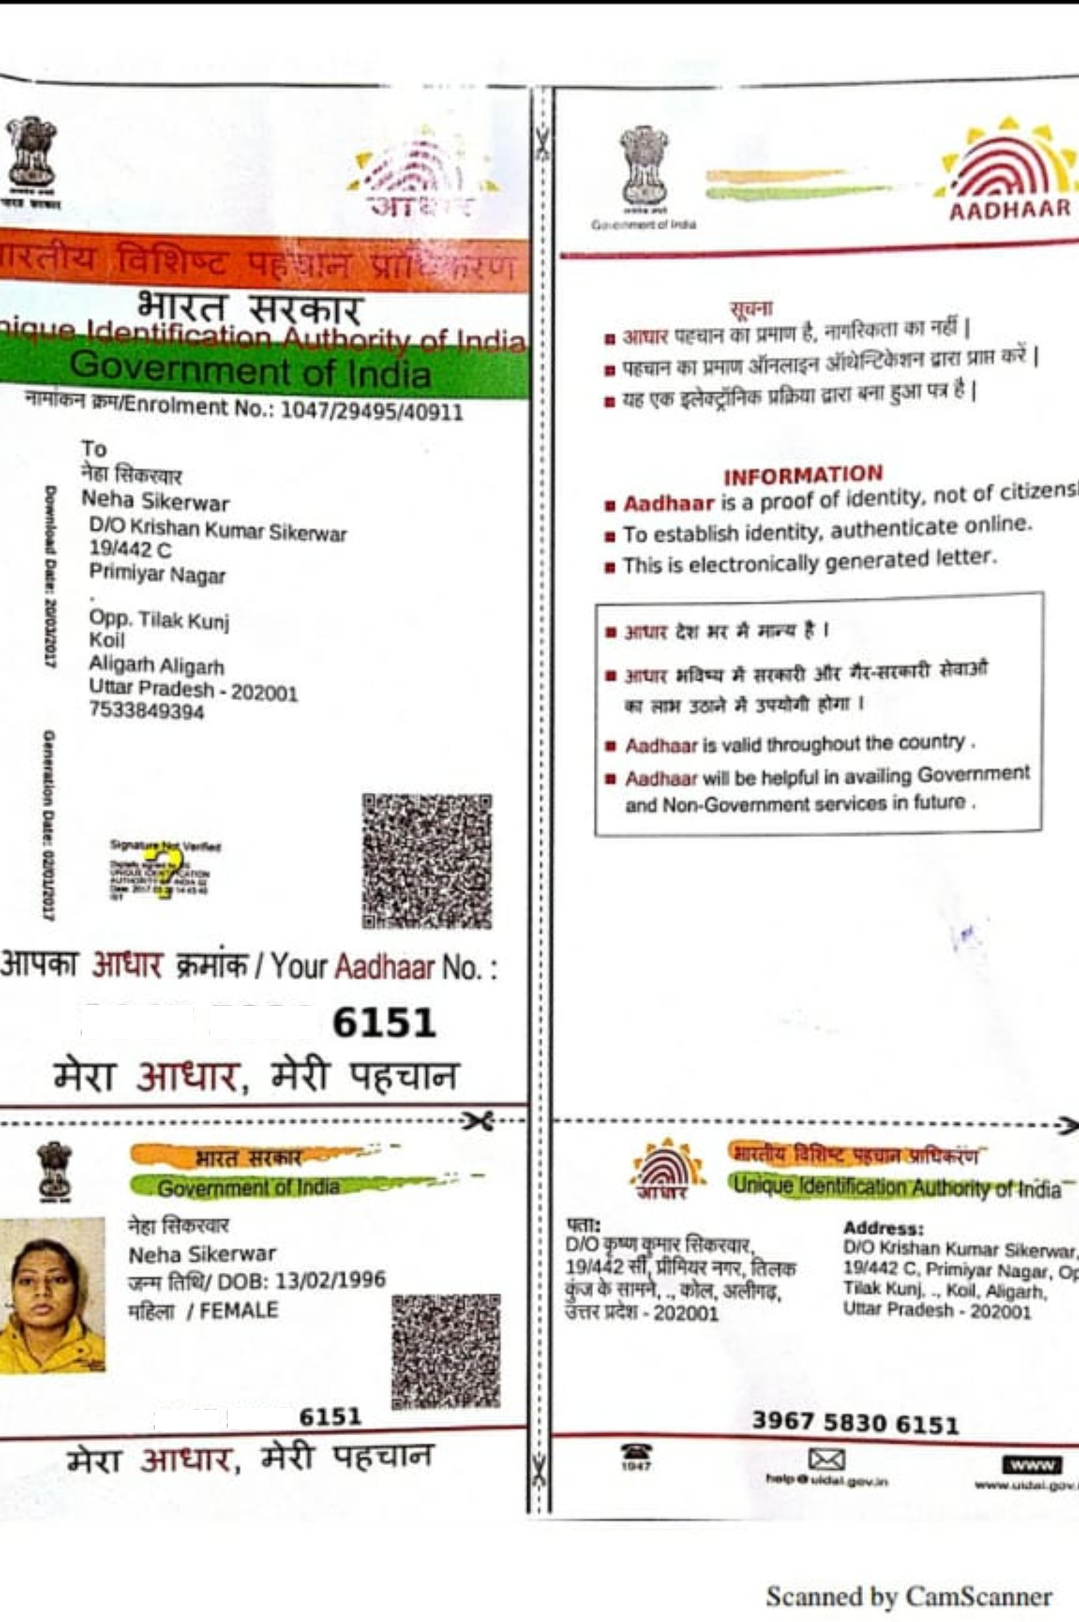

In [61]:
cv2_imshow(overlay)
cv2.waitKey(0)
cv2.destroyAllWindows()

# it is able to detect 2 out of 3 numbers


## Results

I have used 2 methods for the given task (masking 8 digits of aadhar number from aadhar card image) using OCR. 
1. easyocr
2. pytesseract

If we compare the results, easyocr is able to detect the data from image more accurately. Even if aadhar number present at multiple locations. But both method failed for the second image. Means if image is too blurry, none of these method will be able to detect the data correctly. We will be needing strong pre-processing techniques to make it work.
